# Part III. 01. Object Oriented Programming

### Procedural Programming

- Divides a program into a set of functions, so we have data stored in a bunch of variables and functions that operate on the data. 
- This style of programming is very simple and straightforward.
- As your programs grow, you will end up with a bunch of functions that are all over the place.
- You will find yourself copying and pasting lines of code over and over.
- If you make change to one function, and then several other functions break.
- There are so much interdependency between all these functions, and it becomes problematic...


### Object Oriented Programming

- Combines a group of related variables and functions into a unit, called an object. 
- We refer to the variables as properties, and the functions as methods.
- Reduces complexity.
- Increases reusability.
- Isolates impact of changes.
- Eliminates redundant code.
- Refactors ugly statements (e.g., if and else statements, etc).

#### References

https://python-programming.quantecon.org/oop_intro.html

https://python-programming.quantecon.org/python_oop.html

https://intro.quantecon.org/olg.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe

### An overlapping generations model

We assume that time is discrete, so that $t=0,1,\dots$.

An individual born at time $t$ lives for two periods, $t$ and $t+1$.

We call an agent

- “young” during the first period of their lives and

- “old” during the second period of their lives

Young agents work, supplying labor and earning labor income. They also decide how much to save.

Old agents do not work, so all income is financial.

We suppose that each agent supplies one "unit" of labor hours, so total labor supply is 1.

#### Consumer's problem

The consumer aims to solve the following optimization problem
$$
\max_{c_t, c_{t+1}} \left\{u(c_t) + \beta u(c_{t+1}) \right\}
$$
subject to 
$$
c_t + s_t \leq w_t \quad \text{and} \quad c_{t+1} \leq R_{t+1} s_t
$$
The first order condition is 
$$
u'(w_t - s_t) = \beta R_{t+1} u'(R_{t+1} s_t)
$$
For $u(c) = \log c$, the **aggregate capital supply** $s_t$ is
$$
s_t = s(w_t, R_{t+1}) = \frac{\beta}{1+\beta}w_t
$$



#### Firm's problem

Output $y_t$ in period $t$ is given by the Cobb-Douglas production function

$$
y_t = k_t^\alpha \ell_t^{1-\alpha}
$$
The profit maximization problem of the firm is

$$
\max_{k_t, \ell_t} \left\{
    k_t^\alpha \ell_t^{1-\alpha} - R_t k_t - w_t \ell_t
\right\}
$$
The first order conditions are (note that $\ell_t \equiv 1$)

$$
w_t = (1-\alpha) (k_t/\ell_t)^\alpha = (1-\alpha) k_t^\alpha
\quad \text{and} \quad
R_t = \alpha (k_t / \ell_t)^{\alpha - 1} =  \alpha k_t^{\alpha - 1}
$$
Hence the **aggregate capital demand** is 
$$
k_{t+1} = k^d(R_{t+1}) = \left(\frac{\alpha}{R_{t+1}} \right)^{1/(1-\alpha)}
$$

#### Equilibrium

In equilibrium, aggregate demand equals aggregate supply, yielding

$$
k_{t+1} = \frac{\beta}{1+\beta}w_t
\quad \text{and}\quad
R_{t+1} = \alpha \left(
    \frac{\beta}{1+\beta} w_t
\right)^{\alpha - 1}
$$

#### Dynamics

Substituting the $w_t = (1-\alpha)k_t^\alpha$ into the equilibrium condition, we obtain the evolution path of capital

$$
k_{t+1} = \frac{\beta}{1+\beta} (1-\alpha) k_t^\alpha
$$

In the steady state $k_{t+1} = k_t \equiv k^*$, which yields

$$k^* = \left[
    \frac{\beta (1-\alpha)}{1+\beta}
\right]^{1/(1-\alpha)}
\qquad
w^* = \frac{1+\beta}{\beta} k^*
\qquad \text{and}\qquad
R^* = \alpha \left(
    \frac{\beta}{1+\beta} w^*
\right)^{\alpha - 1}
$$

In [2]:
class OLGModel:
    
    def __init__(self, β=0.9, α=0.5):
        self.β, self.α = β, α
        
    def capital_supply(self, w):
        return self.β*w / (1 + self.β)
    
    def capital_demand(self, R):
        α = self.α
        return (α / R)**(1/(1 - α))
    
    def equilibrium(self, w):
        α, β = self.α, self.β
        ke = self.capital_supply(w)
        Re = α * ke**(α-1)
        return ke, Re
    
    def steady_state(self):
        α, β = self.α, self.β
        ks = (β*(1-α)/(1+β))**(1/(1-α))
        ws = (1+β) * ks / β
        Rs = α * (β*ws/(1+β))**(α-1)
        return ks, ws, Rs
    
    def k_update(self, k):
        α, β = self.α, self.β
        return β * (1-α) * (k**α) / (1+β)
    
    def simulate(self, T=100, k0=1):
        α, β = self.α, self.β
        k_sim = np.empty(T)
        k_sim[0] = k0
        for t in range(T-1):
            k_sim[t+1] = self.k_update(k_sim[t])
        w_sim = (1-α) * (k_sim**α)
        R_sim = α * (k_sim**(α-1))
        return k_sim, w_sim, R_sim

In [3]:
olg = OLGModel()
w0 = 2.
ke, Re = olg.equilibrium(w0)
kss, wss, Rss = olg.steady_state()

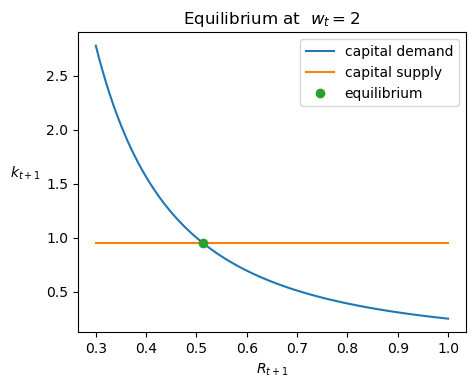

In [4]:
fig, ax = plt.subplots(figsize=(5,3.9))
R_ls = np.linspace(0.3, 1, 100)
ax.plot(R_ls, olg.capital_demand(R_ls), label='capital demand')
ax.plot(R_ls, olg.capital_supply(w0)*np.ones(len(R_ls)), label='capital supply')
ax.plot(Re, ke, 'o', label='equilibrium')
ax.set_xlabel('$R_{t+1}$')
ax.set_ylabel('$k_{t+1}$', rotation=0, labelpad=15)
ax.legend()
plt.title(f'Equilibrium at  $w_t={w0:.0f}$')
plt.show()

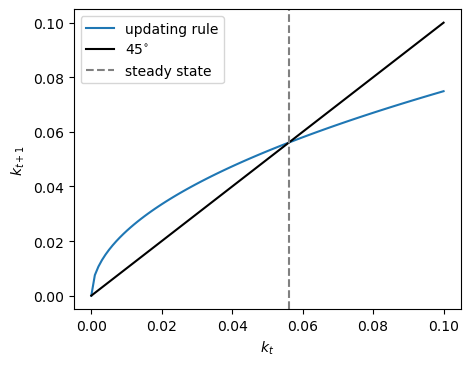

In [5]:
fig, ax = plt.subplots(figsize=(5,3.9))
k_grid = np.linspace(0, 0.1, 100)
ax.plot(k_grid, olg.k_update(k_grid), label='updating rule')
ax.plot(k_grid, k_grid, label='$45^{\\circ}$', c='k')
ax.axvline(kss, c='grey', ls='--', label='steady state')
ax.set_xlabel('$k_t$')
ax.set_ylabel('$k_{t+1}$')
ax.legend()
plt.show()

In [6]:
k_sim, w_sim, R_sim = olg.simulate(25, 0.02)

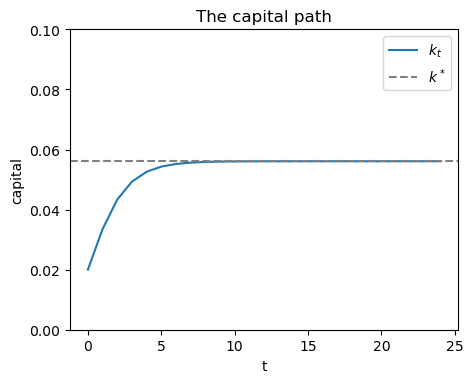

In [7]:
fig, ax = plt.subplots(figsize=(5,3.9))
ax.plot(k_sim, label='$k_t$')
ax.axhline(kss, c='grey', ls='--', label='$k^*$')
ax.set_ylim(0, 0.1)
ax.set_xlabel('t')
ax.set_ylabel('capital')
ax.legend()
plt.title('The capital path')
plt.show()

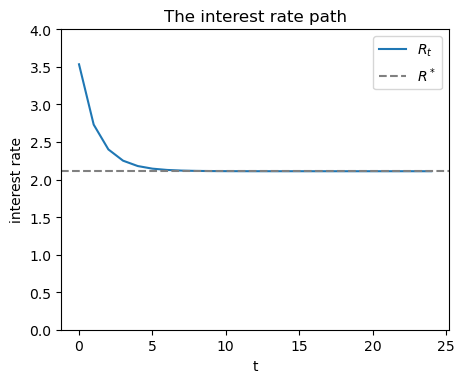

In [8]:
fig, ax = plt.subplots(figsize=(5,3.9))
ax.plot(R_sim, label='$R_t$')
ax.axhline(Rss, c='grey', ls='--', label='$R^*$')
ax.set_ylim(0, 4)
ax.set_xlabel('t')
ax.set_ylabel('interest rate')
ax.legend()
plt.title('The interest rate path')
plt.show()

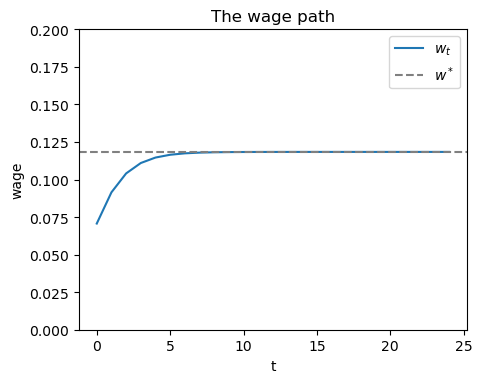

In [9]:
fig, ax = plt.subplots(figsize=(5,3.9))
ax.plot(w_sim, label='$w_t$')
ax.axhline(wss, c='grey', ls='--', label='$w^*$')
ax.set_ylim(0, 0.2)
ax.set_xlabel('t')
ax.set_ylabel('wage')
ax.legend()
plt.title('The wage path')
plt.show()

In [10]:
with qe.Timer():
    olg = OLGModel()
    olg.simulate(10_000_000)

3.53 seconds elapsed
